## Implementação do algoritmo SVM (Support Vector Machine) para classificação de dados
TODO: Comparar holdout e cross-validation

In [43]:
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [44]:
input_file = 'train.csv'

# Load the data
df = pd.read_csv(input_file)

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
# x = df.loc[:, features].values
x=df.drop('price_range',axis=1).values

# y = df.loc[:, target].values
y = df[target].values
# Normalize the data
# x_minmax = MinMaxScaler().fit_transform(x)
# normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)

Holdout - MinMax Data
0.9484848484848485


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


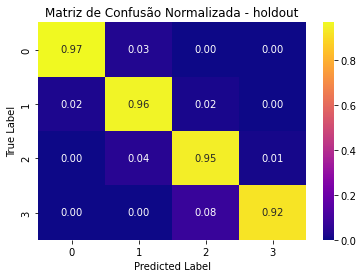

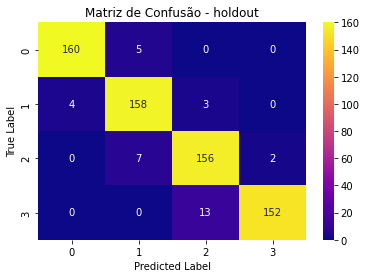

Accuracy: 0.9484848484848485
F1 Score: 0.9486805097886133
Precision: 0.9497528130006193
Recall: 0.9484848484848485
Specificity: 0.9484848484848485
Normalized Confusion Matrix:
 [[0.96969697 0.03030303 0.         0.        ]
 [0.02424242 0.95757576 0.01818182 0.        ]
 [0.         0.04242424 0.94545455 0.01212121]
 [0.         0.         0.07878788 0.92121212]]
Accuracy: 94.85%
F1 Score: 94.87%
Precision: 94.98%
Recall: 94.85%
Cross Validation - Normalized Data


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


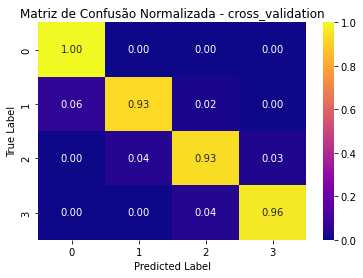

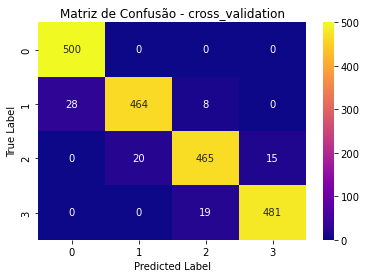

Accuracy: 0.955
F1 Score: 0.9548038826559917
Precision: 0.9551318496639378
Recall: 0.955
Specificity: 0.955
Normalized Confusion Matrix:
 [[1.    0.    0.    0.   ]
 [0.056 0.928 0.016 0.   ]
 [0.    0.04  0.93  0.03 ]
 [0.    0.    0.038 0.962]]
Accuracy: 95.50%
F1 Score: 95.48%
Precision: 95.51%
Recall: 95.50%
Holdout - Z-Score Data
0.9484848484848485


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


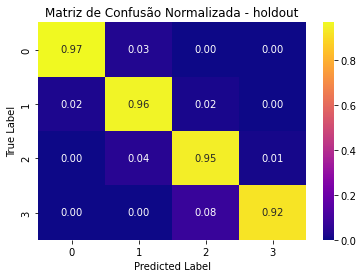

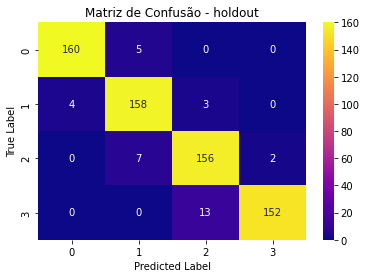

Accuracy: 0.9484848484848485
F1 Score: 0.9486805097886133
Precision: 0.9497528130006193
Recall: 0.9484848484848485
Specificity: 0.9484848484848485
Normalized Confusion Matrix:
 [[0.96969697 0.03030303 0.         0.        ]
 [0.02424242 0.95757576 0.01818182 0.        ]
 [0.         0.04242424 0.94545455 0.01212121]
 [0.         0.         0.07878788 0.92121212]]
Accuracy: 94.85%
F1 Score: 94.87%
Precision: 94.98%
Recall: 94.85%
Cross Validation - Normalized Data


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


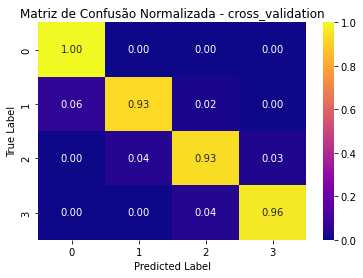

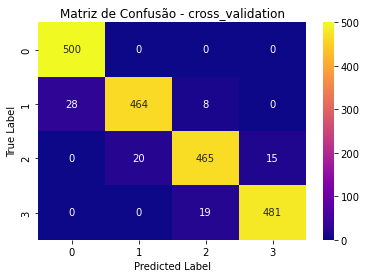

Accuracy: 0.955
F1 Score: 0.9548038826559917
Precision: 0.9551318496639378
Recall: 0.955
Specificity: 0.955
Normalized Confusion Matrix:
 [[1.    0.    0.    0.   ]
 [0.056 0.928 0.016 0.   ]
 [0.    0.04  0.93  0.03 ]
 [0.    0.    0.038 0.962]]
Accuracy: 95.50%
F1 Score: 95.48%
Precision: 95.51%
Recall: 95.50%


In [45]:

def calc_metrics(data, labels, type_split='holdout', show_normalized_cm=False, X=x, y=y):
    
    svm = SVC(kernel='poly', C=1)
    sk_folds = StratifiedKFold(n_splits=10)
    
    accuracy = 0
    f1 = 0
    precision = 0
    recall = 0
    specificity = 0
    
    if type_split == 'holdout':
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=labels)
        svm.fit(x_train, y_train)
        predictions = svm.predict(x_test)
        print (svm.score(x_test, y_test))
    else:  # cross_validation
        predictions = cross_val_predict(svm, X, y, cv=sk_folds)
        x_test, y_test = data, labels  # Para uniformizar as métricas

    conf_matrix = confusion_matrix(y_test, predictions)

    # Métricas
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    specificity = recall_score(y_test, predictions, average='weighted', pos_label=0)
    
    if show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
        plt.title('Matriz de Confusão Normalizada - ' + type_split)   
    else:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
        plt.title('Matriz de Confusão - ' + type_split)   
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    if not show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
        plt.title('Matriz de Confusão Normalizada - ' + type_split)   
    else:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
        plt.title('Matriz de Confusão - ' + type_split)   
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Specificity:', specificity)
    
    if show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix:\n", cm_normalized)
    else:
        print("Confusion Matrix:\n", conf_matrix)

    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")

# Uso exemplo
# data = normalized_zscore  # Supondo que essa seja sua matriz de dados normalizada
data = normalized_minmax
labels = y  # Supondo que esses sejam seus rótulos

print('Holdout - MinMax Data')
calc_metrics(data, labels, 'holdout', show_normalized_cm=True)
print('Cross Validation - Normalized Data')
calc_metrics(data, labels, 'cross_validation', show_normalized_cm=True)

data = normalized_zscore
print('Holdout - Z-Score Data')
calc_metrics(data, labels, 'holdout', show_normalized_cm=True)
print('Cross Validation - Normalized Data')
calc_metrics(data, labels, 'cross_validation', show_normalized_cm=True)



In [46]:
# Create stratified k-fold cross-validation
sk_folds = StratifiedKFold(n_splits = 10)

# Create the model K Nearest Neighbors
# knn = KNeighborsClassifier(n_neighbors=21)
# svm = SVC(kernel='linear', C=1)
def apply_model(x, y):
    
    svm = SVC(kernel='poly', C=1)

    scores = cross_val_score(svm, x, y, cv=sk_folds)
    # use cross_val_predict
    y_pred_cv = cross_val_predict(svm, x, y, cv=sk_folds)


    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    print("Accuracy: ", accuracy_score(y, y_pred_cv))
    print("F1 Score: ", f1_score(y, y_pred_cv, average='weighted'))
    print("Confusion Matrix: \n", confusion_matrix(y, y_pred_cv))
print('Min Max Normalized')
apply_model(normalized_minmax, y)
print('Z-Score Normalized') 
apply_model(normalized_zscore, y)


Min Max Normalized
Cross Validation Scores:  [0.875 0.88  0.86  0.86  0.89  0.905 0.88  0.895 0.875 0.87 ]
Average CV Score:  0.8789999999999999
Number of CV Scores used in Average:  10
Accuracy: 0.88 (+/- 0.03)
Accuracy:  0.879
F1 Score:  0.8788520378086131
Confusion Matrix: 
 [[470  30   0   0]
 [ 45 406  49   0]
 [  0  46 423  31]
 [  0   0  41 459]]
Z-Score Normalized
Cross Validation Scores:  [0.8   0.75  0.805 0.77  0.835 0.795 0.755 0.755 0.79  0.81 ]
Average CV Score:  0.7865
Number of CV Scores used in Average:  10
Accuracy: 0.79 (+/- 0.05)
Accuracy:  0.7865
F1 Score:  0.7896792370878357
Confusion Matrix: 
 [[423  77   0   0]
 [ 42 379  79   0]
 [  0  85 370  45]
 [  0   0  99 401]]


In [47]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'], 
                               index = ['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])
    
    plt.figure(figsize=(8,5))
    print(classification_report(y_test, y_pred))
    # sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True, cmap='plasma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [48]:
def calc_metrics(data, labels, type_split='holdout', show_norm=False):
        
    svm = SVC(kernel='poly', C=1)
    acc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    specificity_scores = []

    conf_matrices = []

    # Normalize the data
    # x_minmax = MinMaxScaler().fit_transform(x)
    # print(x_minmax)
    # normalized_minmax = pd.DataFrame(x_minmax, columns = features)
    # normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

    for train_index, test_index in sk_folds.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # knn.fit(x_train, y_train)
        svm.fit(x_train, y_train)
        # predictions = knn.predict(x_test)
        predictions = svm.predict(x_test)
        
        # Compute the confusion matrix
        cm = confusion_matrix(y_test, predictions)
        conf_matrices.append(cm)
        
        # Compute accuracy, F1 score, precision, recall (sensitivity), and specificity
        acc = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        precision = np.diag(cm) / np.sum(cm, axis = 0)
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        specificity = [np.sum(np.delete(np.delete(cm, i, 0), i, 1)) / (np.sum(np.delete(cm, i, 0))) for i in range(len(cm))]
        
        acc_scores.append(acc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        specificity_scores.append(specificity)

    # Average the scores
    average_accuracy = np.mean(acc_scores)
    average_f1_score = np.mean(f1_scores)
    average_precision = np.mean(precision_scores)
    average_recall = np.mean(recall_scores)
    average_specificity = np.mean(specificity_scores)

    # Fit the model without cross-validation
    # y_pred = knn.predict(x)
    y_pred = svm.predict(x)

    print(f"Average Accuracy: {average_accuracy*100:.2f}%")
    print(f"Average F1 Score: {average_f1_score*100:.2f}%")
    print(f"Average Precision: {average_precision*100:.2f}%")
    print(f"Average Recall: {average_recall*100:.2f}%")
    print(f"Average Specificity: {average_specificity*100:.2f}%")

    cm_rfc=my_confusion_matrix(y, y_pred, 'SVM Confusion Matrix')
    cm_rfc_cv = my_confusion_matrix(y, y_pred_cv, 'SVM Confusion Matrix CV')

Normalized confusion matrix
[[1.    0.    0.    0.   ]
 [0.056 0.928 0.016 0.   ]
 [0.    0.04  0.93  0.03 ]
 [0.    0.    0.038 0.962]]


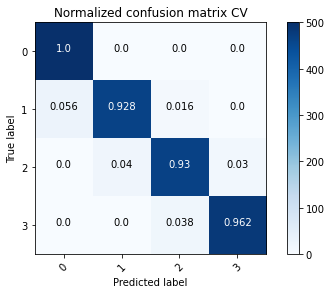

Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.         0.99152542 0.00847458 0.        ]
 [0.         0.00852273 0.98863636 0.00284091]
 [0.         0.         0.0057971  0.9942029 ]]


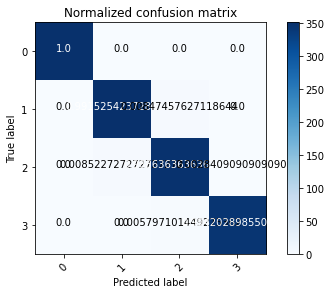

In [49]:

"""
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    
# plot_confusion_matrix(np.sum(conf_matrices, axis=0), classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')
# plt.show()
# plot with cv
plot_confusion_matrix(cm_rfc_cv, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix CV')
plt.show()
#plot without cv
plot_confusion_matrix(cm_rfc, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')

In [50]:
# svm utilizing holdout instead of cross-validation


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1)

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('---- Holdout ----')
print('Test Set')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print('Train Set')
print("Accuracy: ", accuracy_score(y_train, y_pred_train))
print("F1 Score: ", f1_score(y_train, y_pred_train, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train))


---- Holdout ----
Test Set
Accuracy:  0.9733333333333334
F1 Score:  0.9733206542476304
Confusion Matrix: 
 [[146   5   0   0]
 [  1 145   0   0]
 [  0   4 139   5]
 [  0   0   1 154]]
Train Set
Accuracy:  0.9935714285714285
F1 Score:  0.9935744327932203
Confusion Matrix: 
 [[349   0   0   0]
 [  0 351   3   0]
 [  0   3 348   1]
 [  0   0   2 343]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.97       146
           2       0.99      0.94      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



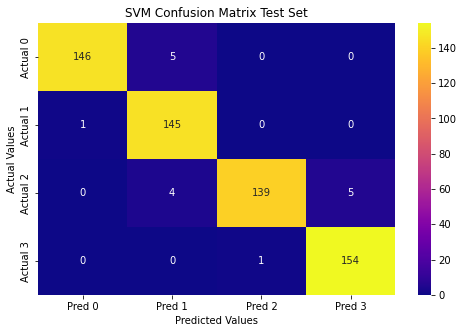

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       0.99      0.99      0.99       354
           2       0.99      0.99      0.99       352
           3       1.00      0.99      1.00       345

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



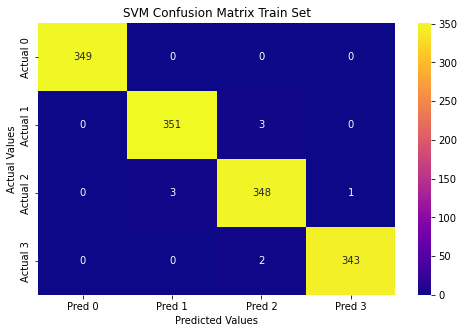

In [51]:
# print confusion matrix
cm_rfc=my_confusion_matrix(y_test, y_pred, 'SVM Confusion Matrix Test Set')
cm_rfc=my_confusion_matrix(y_train, y_pred_train, 'SVM Confusion Matrix Train Set')
# plot_confusion_matrix(cm_rfc, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')